In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\StudentsPerformance (1).csv")

In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [6]:
missing_percent[missing_percent > 0]

Series([], dtype: float64)

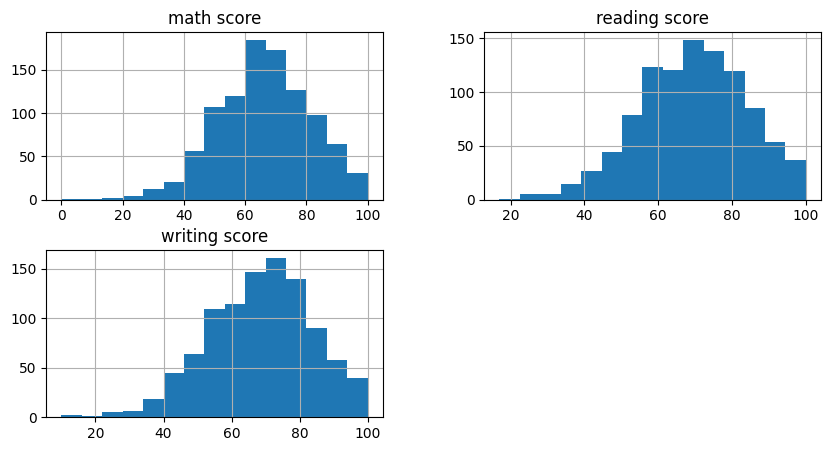

In [7]:
#histogram
df[['math score', 'reading score', 'writing score']].hist(
    bins=15, figsize=(10,5)
)
plt.show()

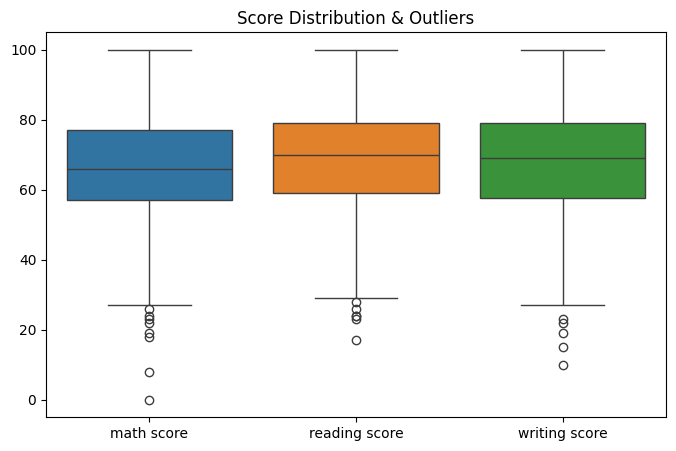

In [8]:
#Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Score Distribution & Outliers")
plt.show()

In [10]:
#IQR function
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)
df['math_outlier'] = detect_outliers_iqr(df['math score'])
df['reading_outlier'] = detect_outliers_iqr(df['reading score'])
df['writing_outlier'] = detect_outliers_iqr(df['writing score'])

In [11]:
df['outlier_flag'] = (
    df['math_outlier'] |
    df['reading_outlier'] |
    df['writing_outlier']
)

In [12]:
df['outlier_flag'].value_counts()

outlier_flag
False    988
True      12
Name: count, dtype: int64

In [13]:
#Handle Outliers
df_cleaned = df[df['outlier_flag'] == False]

In [14]:
#Correlation Matrix
corr = df_cleaned[['math score', 'reading score', 'writing score']].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.801405,0.783349
reading score,0.801405,1.000000,0.950629
writing score,0.783349,0.950629,1.000000


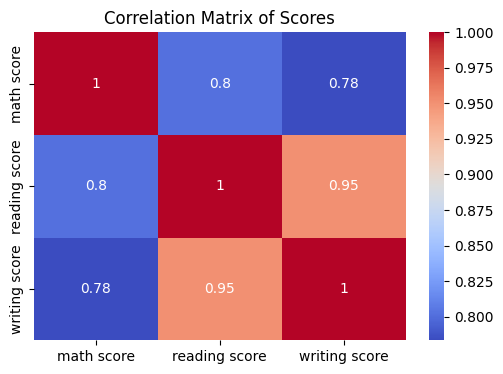

In [15]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Scores")
plt.show()

In [17]:
#Export Cleaned Dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
